In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
%cd /content/drive/MyDrive/Springboard/SecondCapstone/data

/content/drive/MyDrive/Springboard/SecondCapstone/data


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
from sklearn.preprocessing import OneHotEncoder
#import statsmodels.api as sm # What does this do? Find out and type here.
#from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
#from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
#from sklearn.model_selection import train_test_split # For splitting the data.
#from sklearn import linear_model, preprocessing 

In [3]:
data = pd.read_csv('tr_clean.csv')

Gathering Basic Information from a high level view

In [4]:
data.head(3)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex_m0f1,income_poverty,married,own_home,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,False,False,False,False,False,True,True,False,False,False,False,False,True,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,True,Below Poverty,False,True,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,False,False
1,3.0,2.0,False,True,False,True,False,True,True,False,False,False,False,False,True,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,False,Below Poverty,False,False,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,False,True
2,1.0,1.0,False,True,False,False,False,False,False,True,True,True,False,False,True,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,False,"<= $75,000, Above Poverty",False,True,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,False,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24761 entries, 0 to 24760
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 24761 non-null  float64
 1   h1n1_knowledge               24761 non-null  float64
 2   behavioral_antiviral_meds    24761 non-null  bool   
 3   behavioral_avoidance         24761 non-null  bool   
 4   behavioral_face_mask         24761 non-null  bool   
 5   behavioral_wash_hands        24761 non-null  bool   
 6   behavioral_large_gatherings  24761 non-null  bool   
 7   behavioral_outside_home      24761 non-null  bool   
 8   behavioral_touch_face        24761 non-null  bool   
 9   doctor_recc_h1n1             24761 non-null  bool   
 10  doctor_recc_seasonal         24761 non-null  bool   
 11  chronic_med_condition        24761 non-null  bool   
 12  child_under_6_months         24761 non-null  bool   
 13  health_worker   

In [6]:
#Upon further analysis i've concluded almost all of the data should be treated as categorical 
#Most questions are given a numeric value based on the participants opinion and aren't from quantative data
#even for features such as number of household children, the responses are restricted to only a few values and 
#can be broken out using One Hot Encoding..

#Converting Floats Objects
data[data.select_dtypes(include='float64').columns] = data[data.select_dtypes(include='float64').columns].astype('object')

In [7]:
#Setting sex_m0f1 back to "sex" to be later used with 1 hot encoding

data.rename(columns={'sex_m0f1':'sex'}, inplace=True)
data['sex'].replace({False:'Male' , True:'Female' }, inplace=True)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6

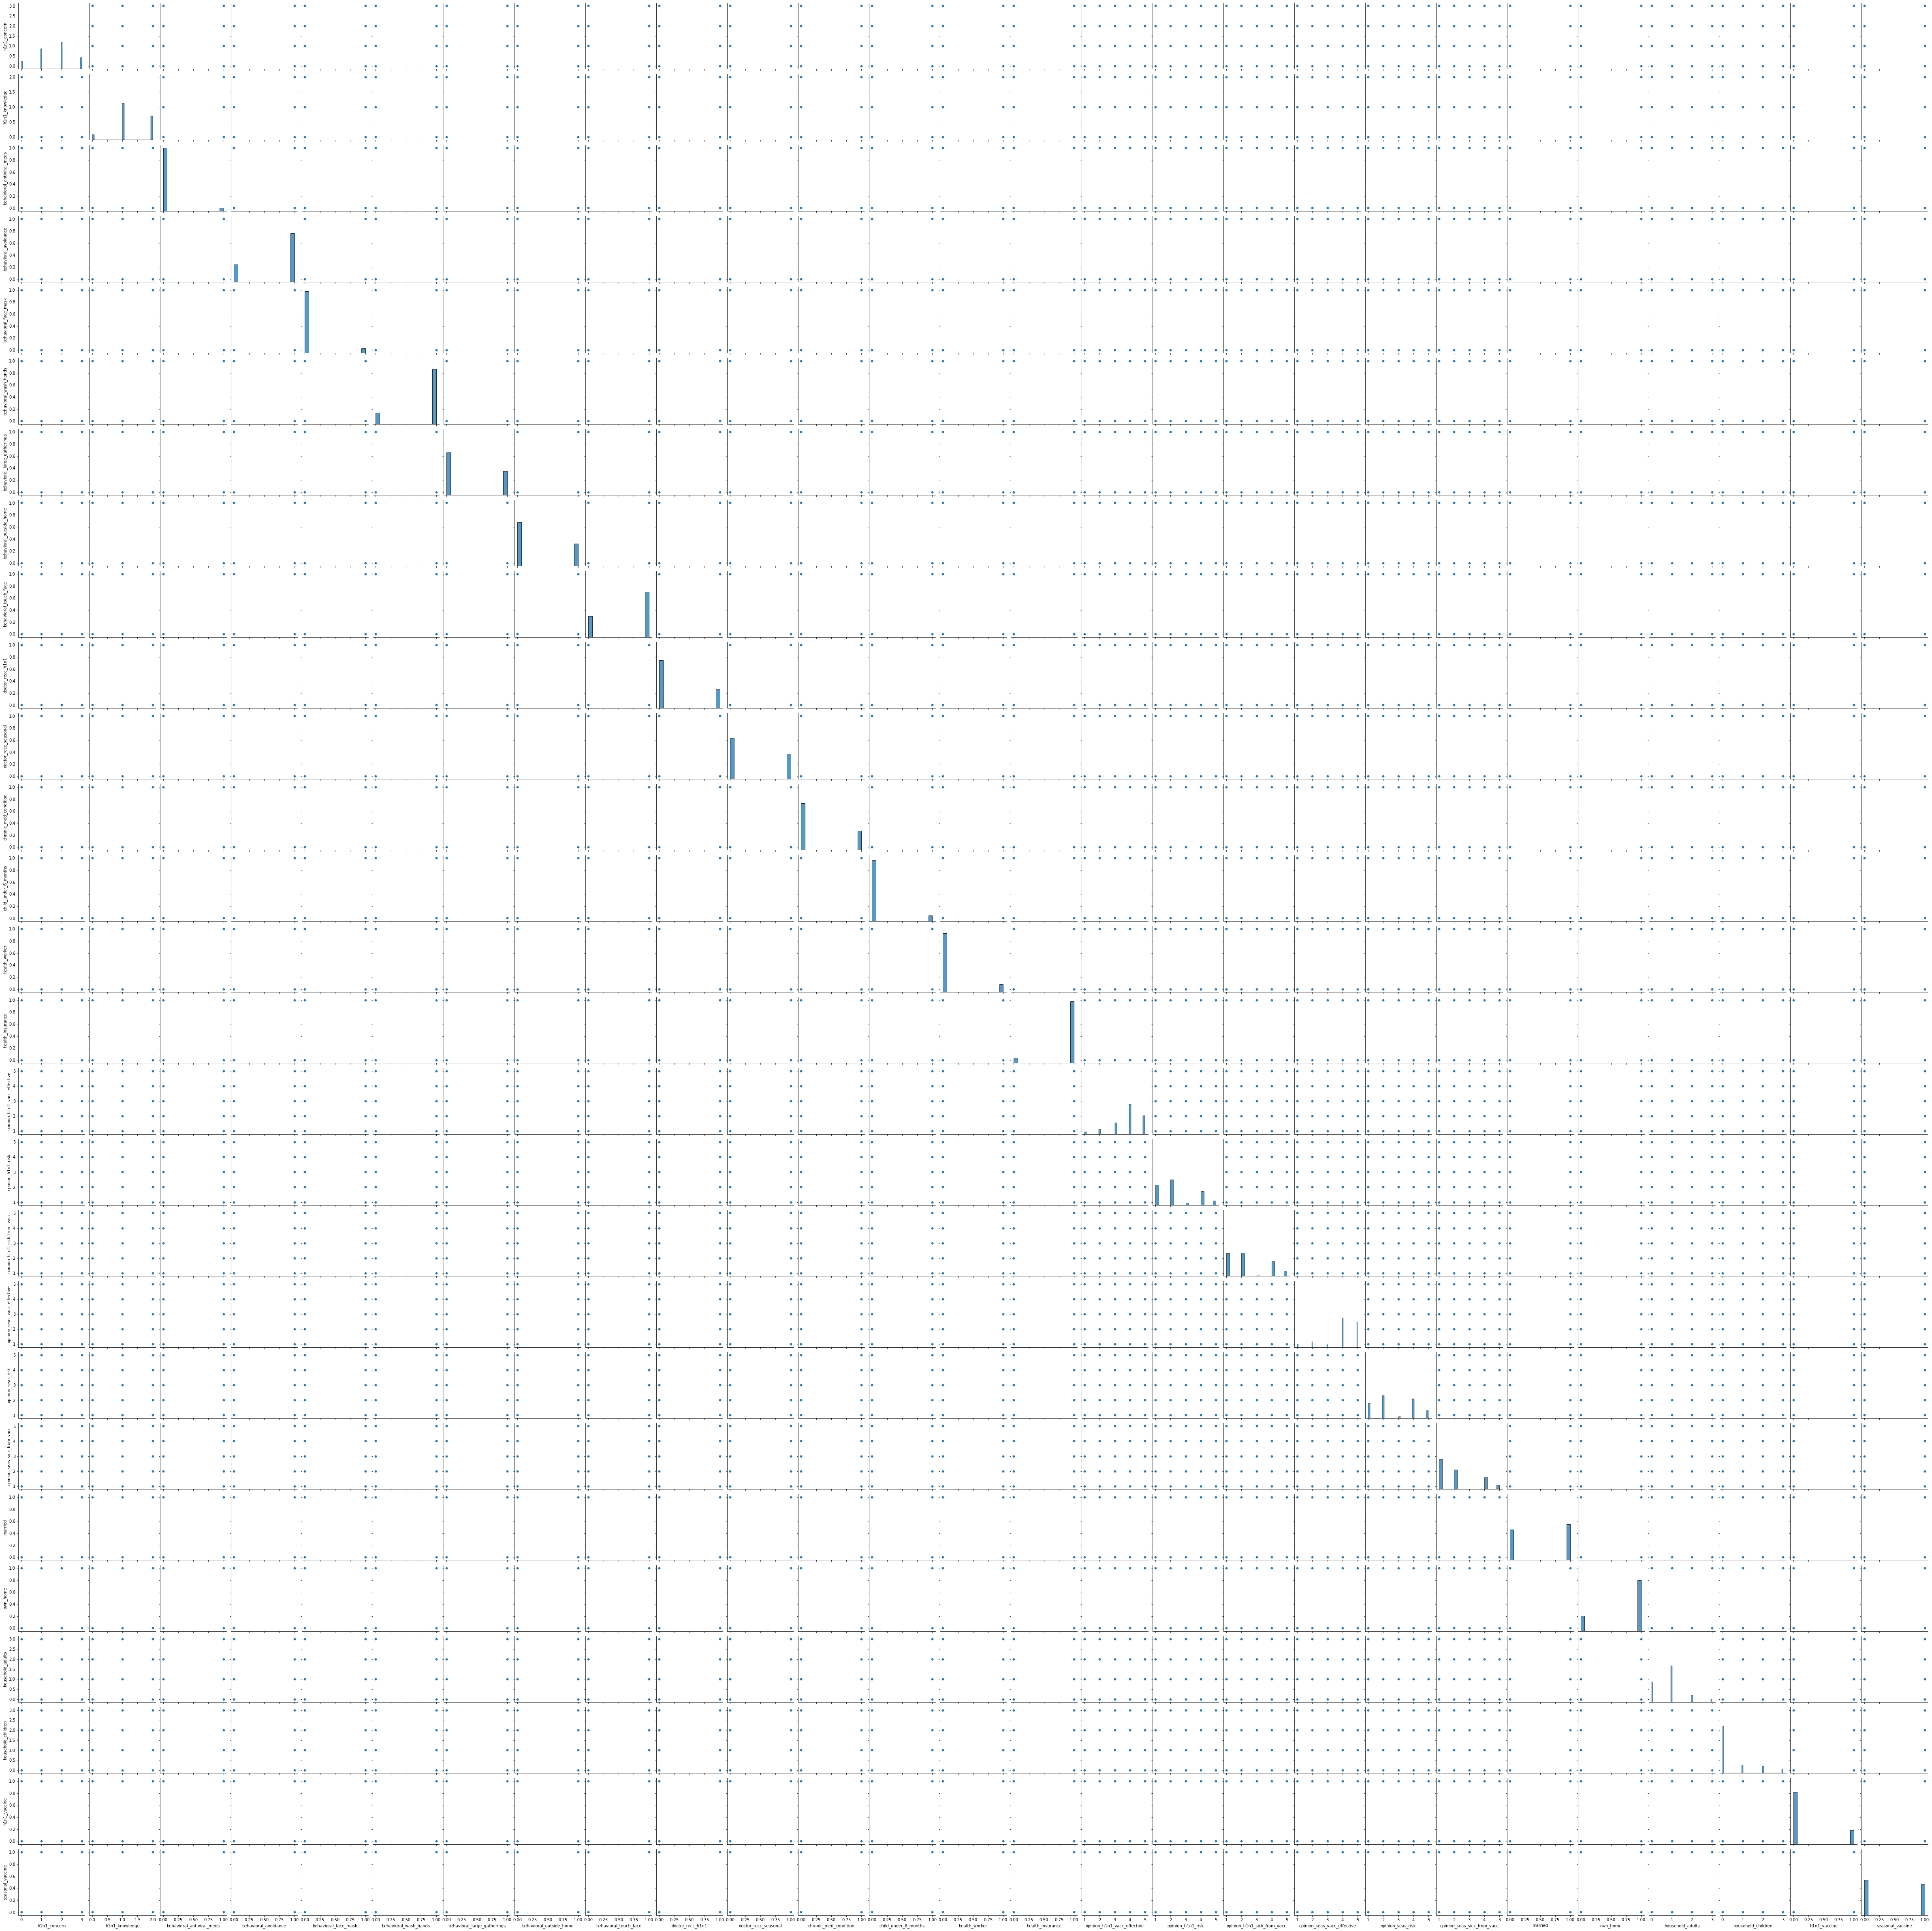

In [8]:
#Pairplot before doing 1 hot encoding
sns.pairplot(data)

In [9]:
#Converting categorical variables into boolean using one hot encoding
print("Shape before one hot encoding: ", data.shape)

obj_col = data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns = obj_col)

print("Shape after one hot encoding: ", data.shape)

Shape before one hot encoding:  (24761, 35)
Shape after one hot encoding:  (24761, 97)


The goal of analyzing this data set is to predict what factors will lead to an individual choosing to get vaccinated or not.  For use in comparison to the current COVID-19 pandemic h1n1_vaccine rates are more important but we might as well do the analysis on seasonal vaccines as well.  Therefore our
Dependent Variables are 'h1n1_vaccine' & 'seasonal_vaccine'



5305  of  24761  individuals took the h1n1 vaccine  21 %
19456  of  24761  individuals did not take the h1n1 vaccine  79 %
11645  of  24761  individuals took the seasonal vaccine  47 %
13116  of  24761  individuals did not take the seasonal vaccine  53 %


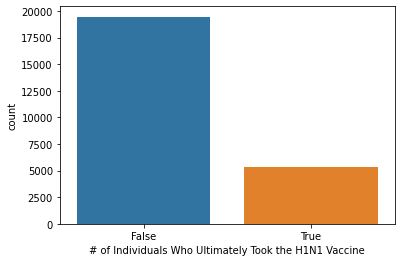

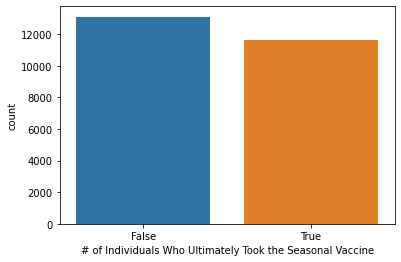

In [10]:
print(data['h1n1_vaccine'].value_counts()[1], ' of ', len(data['h1n1_vaccine']), ' individuals took the h1n1 vaccine ',round(data['h1n1_vaccine'].value_counts()[1]/len(data['h1n1_vaccine'])*100) ,'%')
print(data['h1n1_vaccine'].value_counts()[0], ' of ', len(data['h1n1_vaccine']), ' individuals did not take the h1n1 vaccine ',round(data['h1n1_vaccine'].value_counts()[0]/len(data['h1n1_vaccine'])*100) ,'%')

print(data['seasonal_vaccine'].value_counts()[1], ' of ', len(data['seasonal_vaccine']), ' individuals took the seasonal vaccine ',round(data['seasonal_vaccine'].value_counts()[1]/len(data['seasonal_vaccine'])*100) ,'%')
print(data['seasonal_vaccine'].value_counts()[0], ' of ', len(data['seasonal_vaccine']), ' individuals did not take the seasonal vaccine ',round(data['seasonal_vaccine'].value_counts()[0]/len(data['seasonal_vaccine'])*100) ,'%')

sns.countplot(x=data['h1n1_vaccine'])
plt.xlabel("# of Individuals Who Ultimately Took the H1N1 Vaccine")
plt.show()

sns.countplot(x=data['seasonal_vaccine'])
plt.xlabel("# of Individuals Who Ultimately Took the Seasonal Vaccine")
plt.show()

A lot more people were willing to take the seasonal flu vaccine over the h1n1 specific vaccine, over twice as many.

In [11]:
#With so many features now after the 1hot encoding lets see what a pearson correlation looks like
data_corr = data.corr()

In [12]:
#Return features where the correlation is 20% or greater
data_corr[['h1n1_vaccine']][data_corr['h1n1_vaccine'] > 0.2]

,h1n1_vaccine
doctor_recc_h1n1,0.299552
h1n1_vaccine,1.000000
seasonal_vaccine,0.377081
opinion_h1n1_vacc_effective_5.0,0.291795
opinion_h1n1_risk_4.0,0.225609
opinion_h1n1_risk_5.0,0.200721


In [13]:
# In this dataset negative correlation can prove insightful, returning any features with a negative correlation greater than 20%
data_corr[['h1n1_vaccine']][data_corr['h1n1_vaccine'] < -0.2]

,h1n1_vaccine
opinion_h1n1_risk_1.0,-0.204416


In [14]:
data_corr[['seasonal_vaccine']][data_corr['seasonal_vaccine'] > 0.2]

,seasonal_vaccine
doctor_recc_seasonal,0.306803
h1n1_vaccine,0.377081
seasonal_vaccine,1.000000
opinion_seas_vacc_effective_5.0,0.372141
opinion_seas_risk_4.0,0.254466
opinion_seas_risk_5.0,0.200708
age_group_65+ Years,0.244196


In [15]:
# In this dataset negative correlation can prove insightful, returning any features with a negative correlation greater than 20%
data_corr[['seasonal_vaccine']][data_corr['seasonal_vaccine'] < -0.2]

,seasonal_vaccine
opinion_seas_risk_1.0,-0.28494


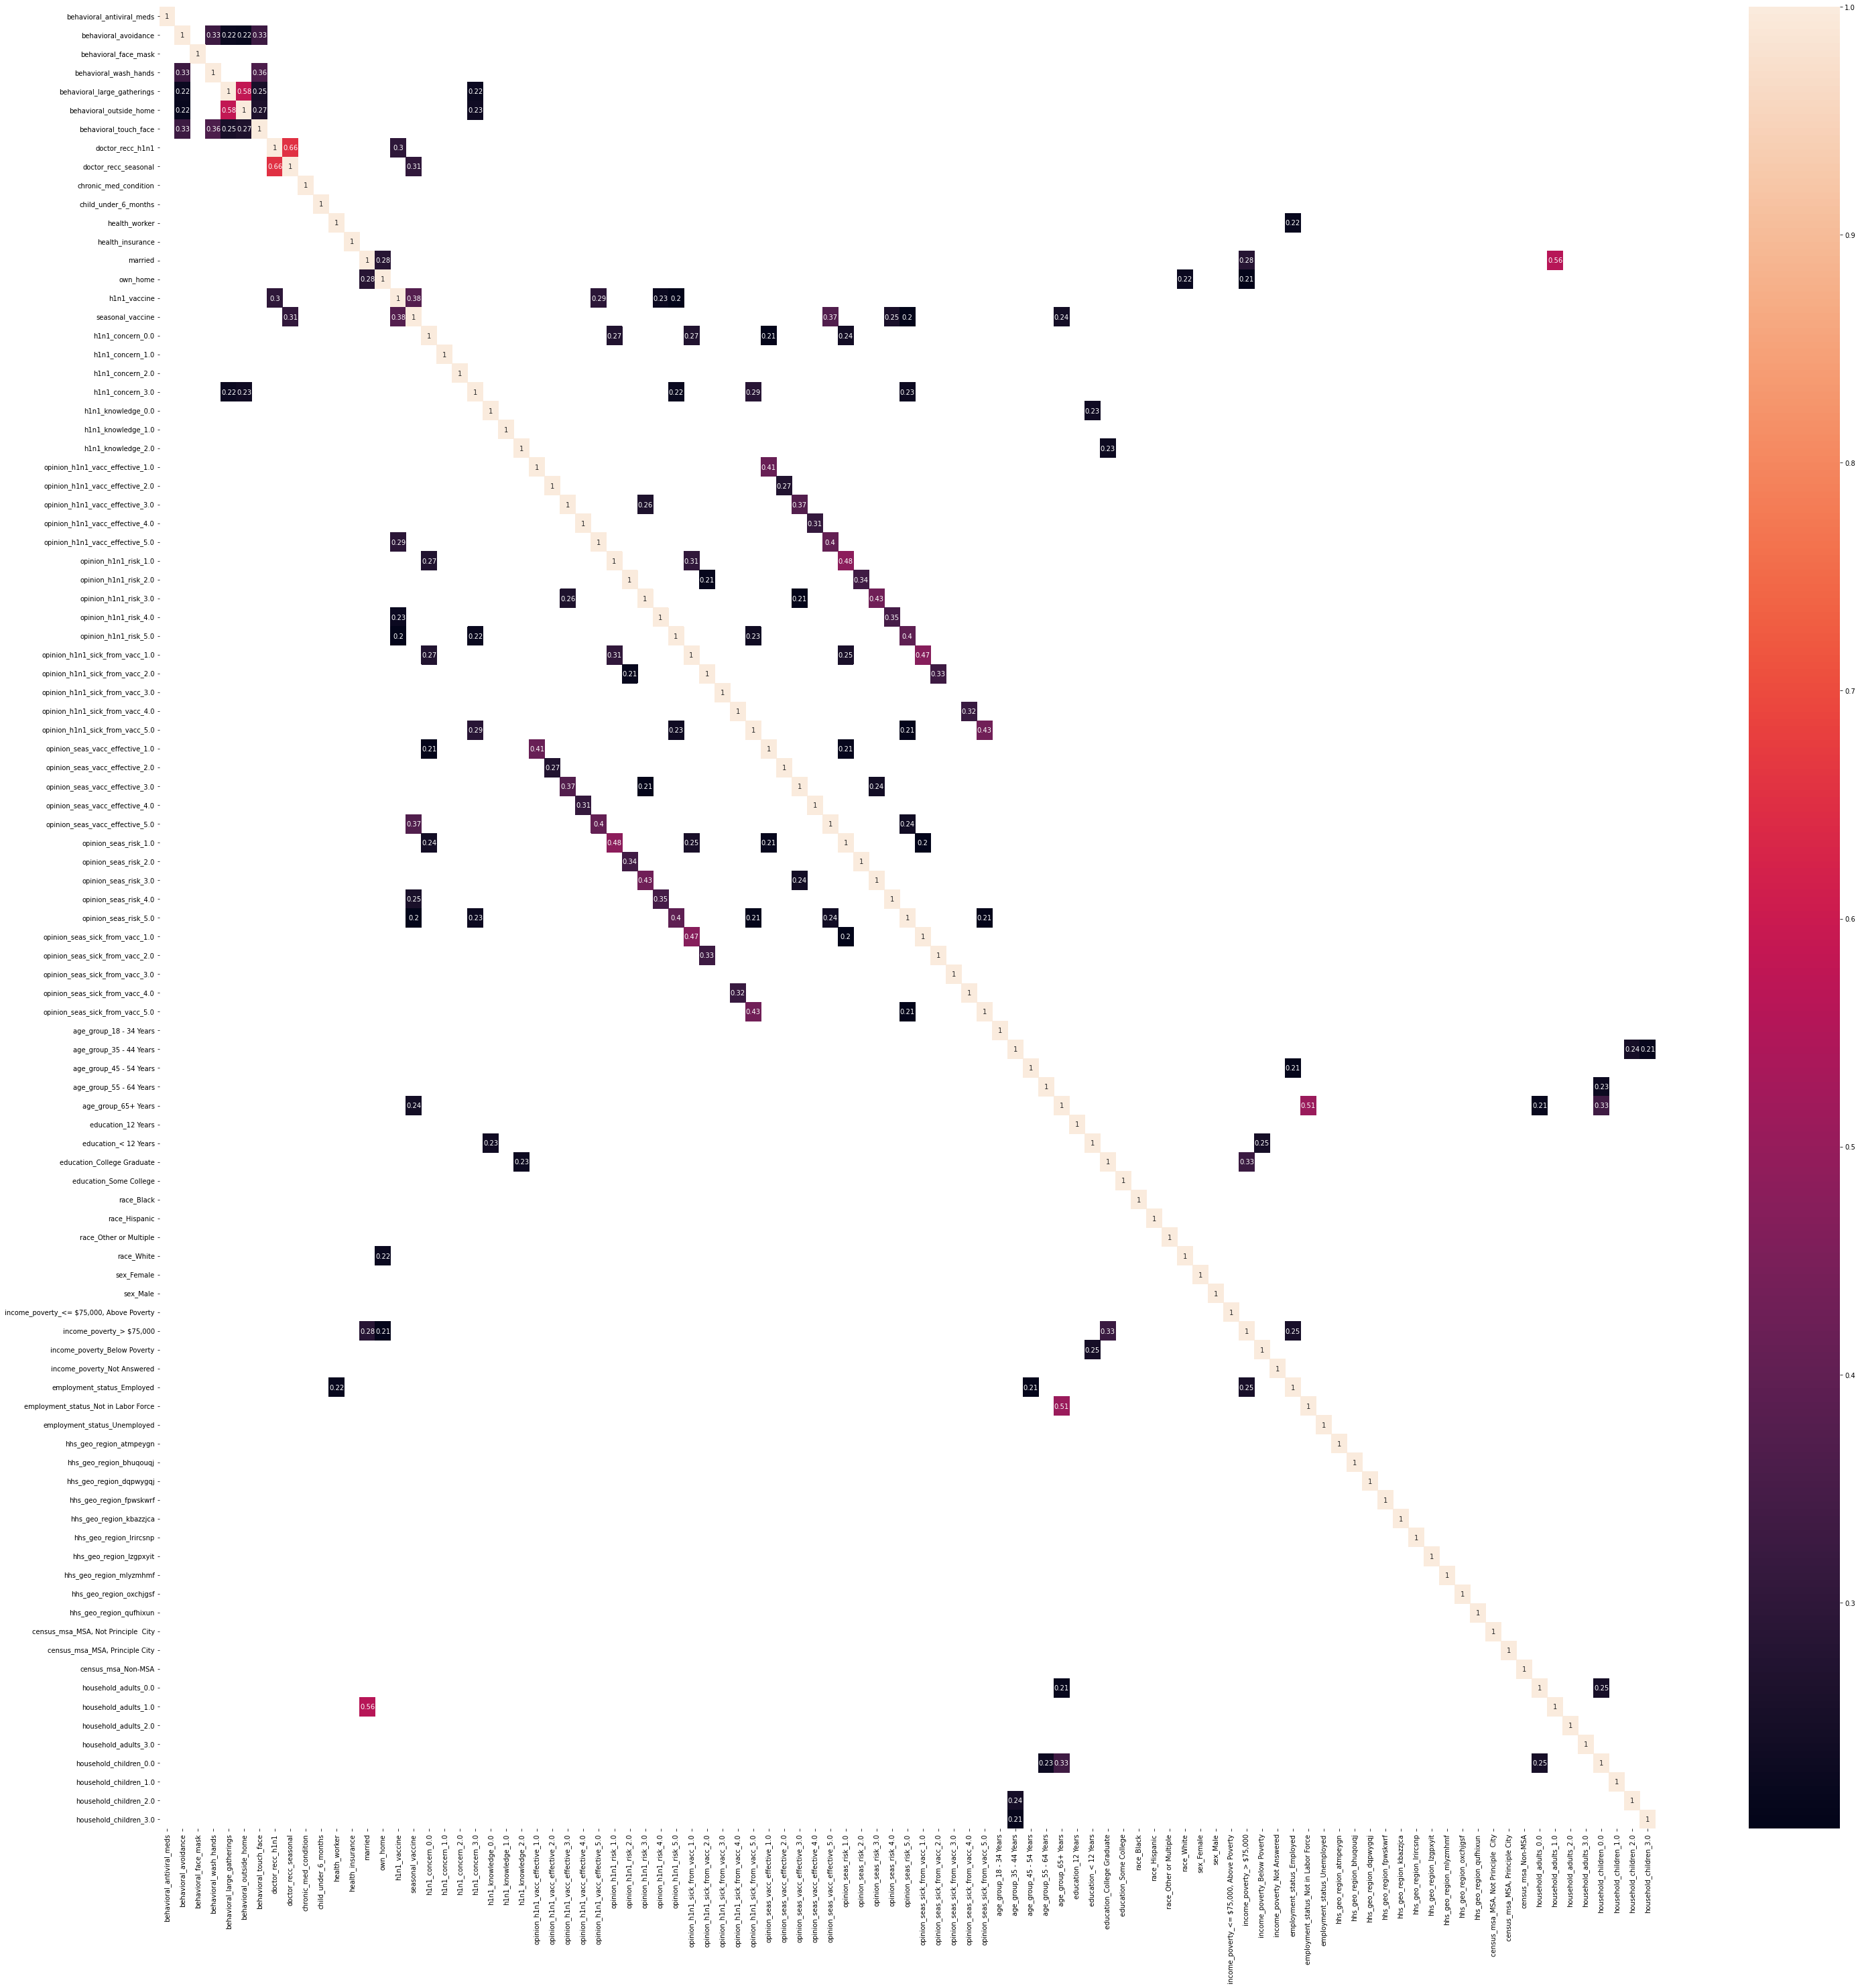

In [16]:
#Too much data to parse by eye, lets look at a heatmap filtered to values greater than 0.2
plt.figure(figsize=(50,50))
sns.heatmap(data_corr[data_corr > 0.2], annot=True)

There is so much data even the filtered heat map only helps so much.

In [17]:
print('Feature Correlation greater than 0.1: ', list(data_corr[data_corr['h1n1_vaccine'] >= 0.1]['h1n1_vaccine'].index))
print('Feature Correlation greater than 0.2: ', list(data_corr[data_corr['h1n1_vaccine'] >= 0.2]['h1n1_vaccine'].index))
print('Feature Correlation less than -0.1: ', list(data_corr[data_corr['h1n1_vaccine'] <= -0.1]['h1n1_vaccine'].index))
print('Feature Correlation less than -0.2: ', list(data_corr[data_corr['h1n1_vaccine'] <= -0.2]['h1n1_vaccine'].index))

Feature Correlation greater than 0.1:  ['doctor_recc_h1n1', 'doctor_recc_seasonal', 'health_worker', 'h1n1_vaccine', 'seasonal_vaccine', 'h1n1_knowledge_2.0', 'opinion_h1n1_vacc_effective_5.0', 'opinion_h1n1_risk_4.0', 'opinion_h1n1_risk_5.0', 'opinion_seas_vacc_effective_5.0', 'opinion_seas_risk_4.0', 'opinion_seas_risk_5.0']
Feature Correlation greater than 0.2:  ['doctor_recc_h1n1', 'h1n1_vaccine', 'seasonal_vaccine', 'opinion_h1n1_vacc_effective_5.0', 'opinion_h1n1_risk_4.0', 'opinion_h1n1_risk_5.0']
Feature Correlation less than -0.1:  ['opinion_h1n1_vacc_effective_2.0', 'opinion_h1n1_vacc_effective_3.0', 'opinion_h1n1_risk_1.0', 'opinion_seas_risk_1.0']
Feature Correlation less than -0.2:  ['opinion_h1n1_risk_1.0']


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


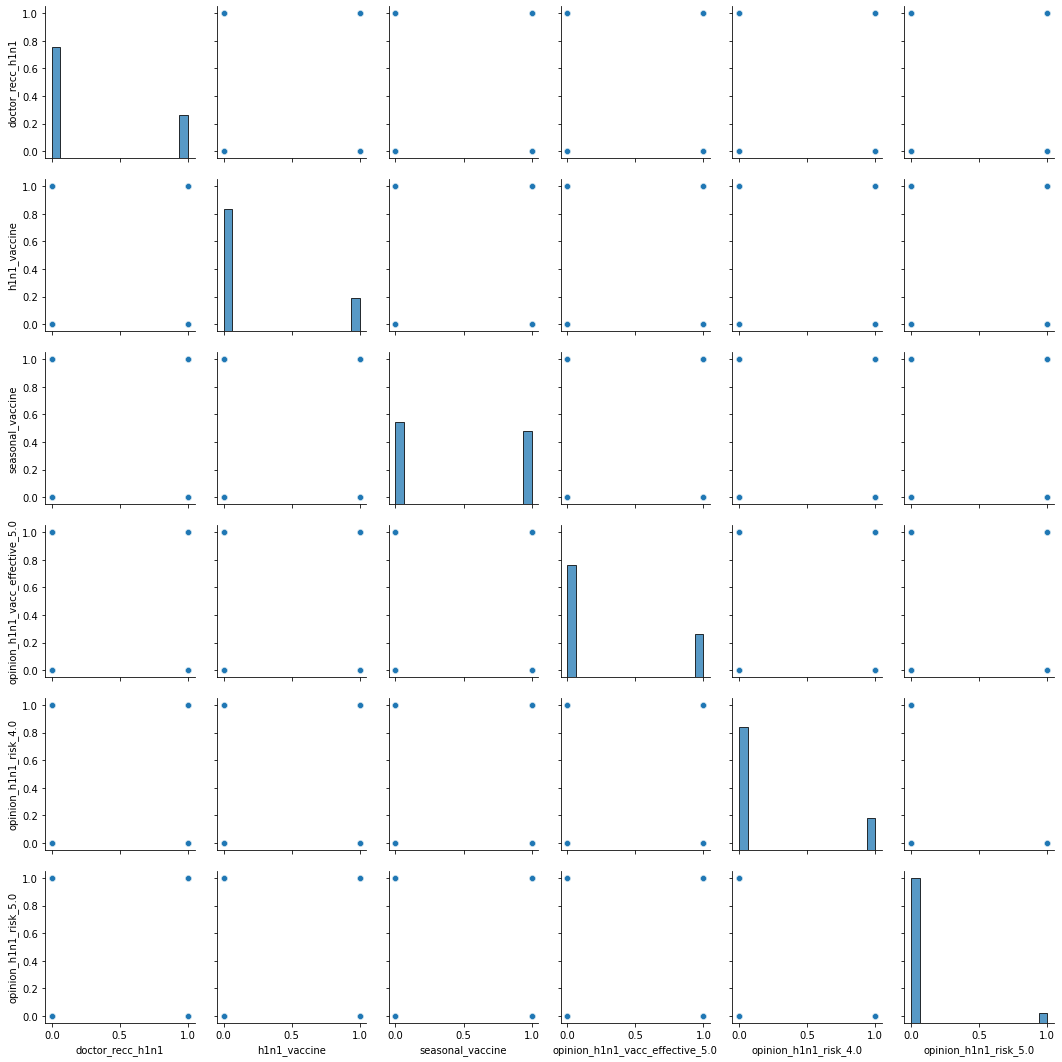

In [18]:
#Now that we know the most correlated features let's filter the data and try the pairplot
h1n1_pair = data[list(data_corr[data_corr['h1n1_vaccine'] >= 0.2]['h1n1_vaccine'].index)]
sns.pairplot(h1n1_pair)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


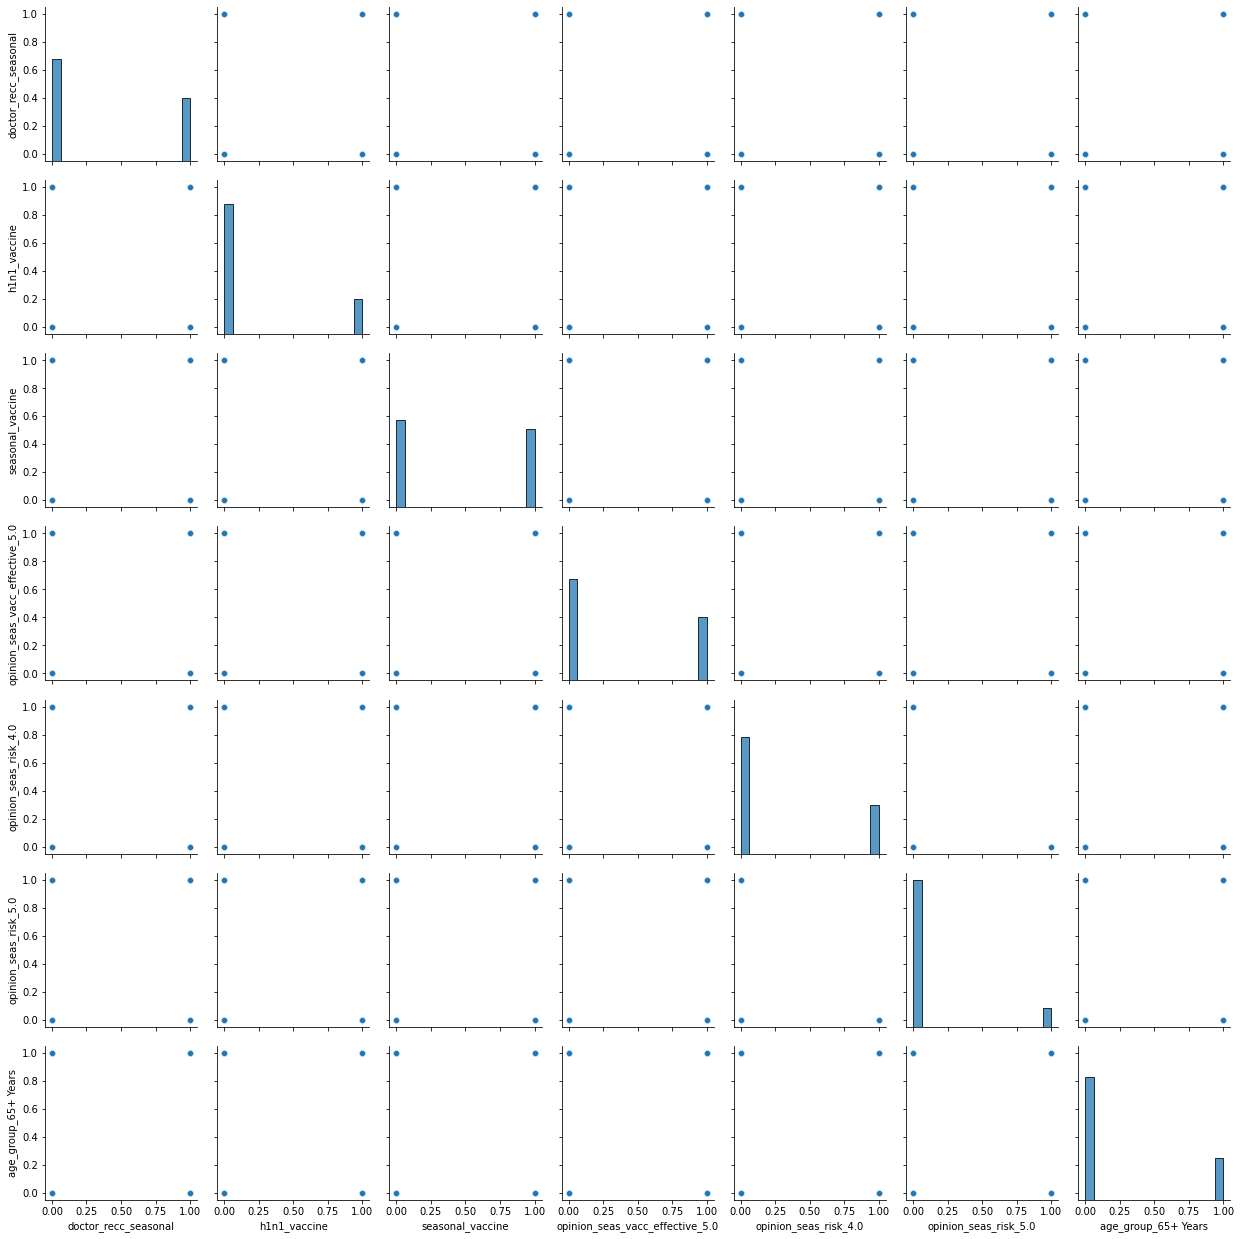

In [19]:
seasonal_pair = data[list(data_corr[data_corr['seasonal_vaccine'] >= 0.2]['seasonal_vaccine'].index)]
sns.pairplot(seasonal_pair)

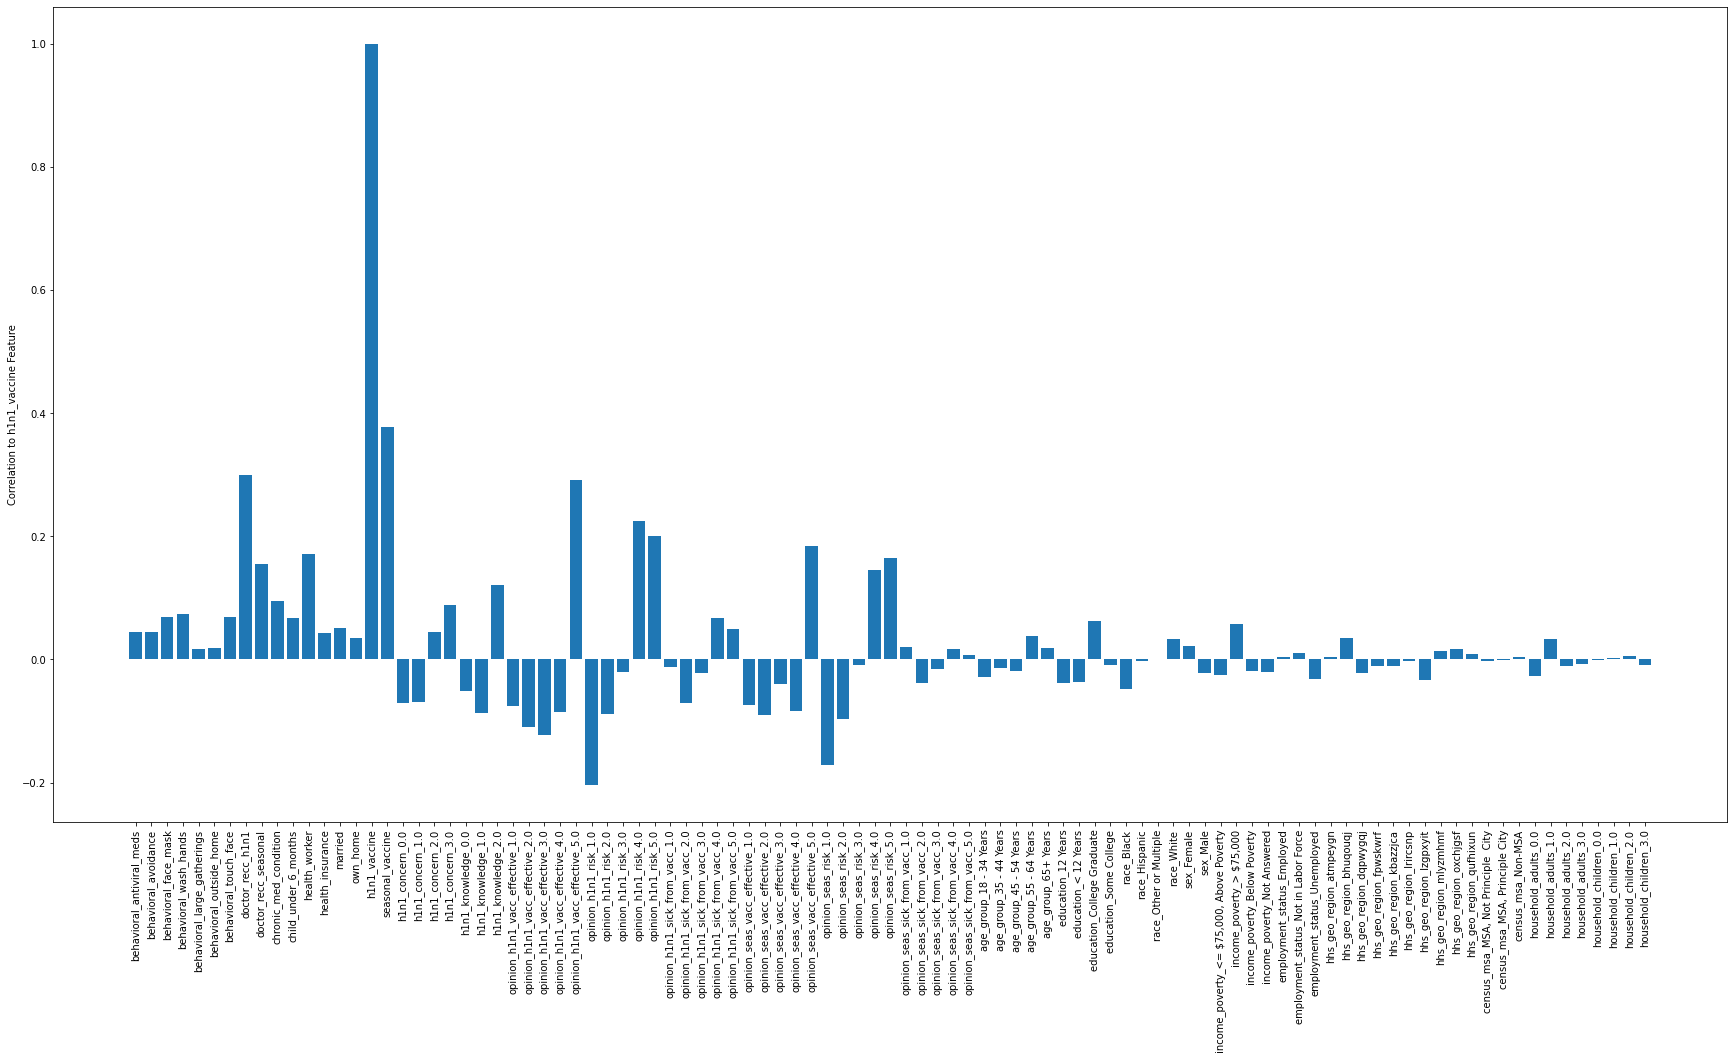

In [20]:
#Pair plot isn't particularly helpful since we're dealing with alot of boolean values
#Let's plot the correlation per feature as a bar graph
feats = list(data_corr.index)
plt.figure(figsize=(30,15))
plt.bar(np.arange(len(feats)), data_corr['h1n1_vaccine'])
plt.xticks(np.arange(len(feats)), feats, rotation=90)
plt.ylabel('Correlation to h1n1_vaccine Feature')
plt.show()

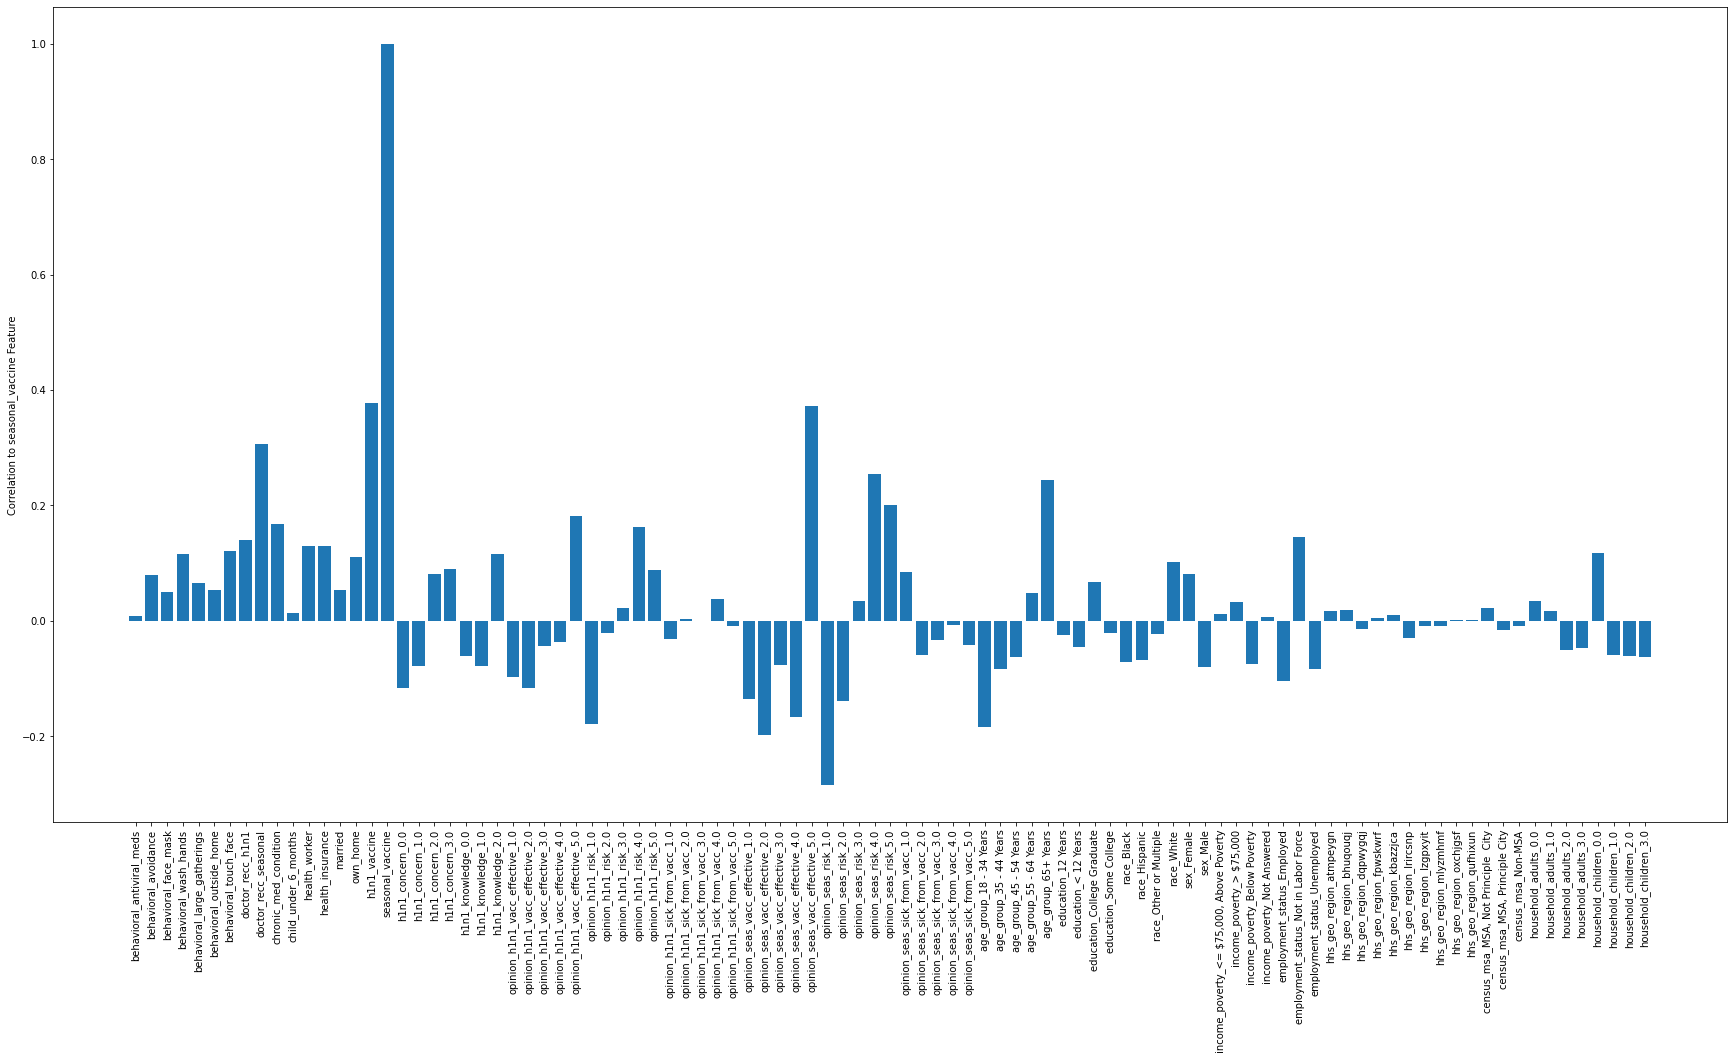

In [21]:
plt.figure(figsize=(30,15))
plt.bar(np.arange(len(feats)), data_corr['seasonal_vaccine'])
plt.xticks(np.arange(len(feats)), feats, rotation=90)
plt.ylabel('Correlation to seasonal_vaccine Feature')
plt.show()

The most highly correlated features to taking the h1n1 vaccine are
 
doctor_recc_h1n1, health_worker, opinion_h1n1_vacc_effective_5, opinion_h1n1_risk_4.0, opinion_h1n1_risk_5.0, opinion_seas_vacc_effective_5.0, opinion_seas_risk_4.0, opinion_seas_risk_5.0

In [22]:
print('Feature Correlation greater than 0.1: ', list(data_corr[data_corr['seasonal_vaccine'] >= 0.1]['seasonal_vaccine'].index))
print('Feature Correlation greater than 0.2: ', list(data_corr[data_corr['seasonal_vaccine'] >= 0.2]['seasonal_vaccine'].index))
print('Feature Correlation greater than 0.3: ', list(data_corr[data_corr['seasonal_vaccine'] >= 0.3]['seasonal_vaccine'].index))
print('Feature Correlation less than -0.1: ', list(data_corr[data_corr['seasonal_vaccine'] <= -0.1]['seasonal_vaccine'].index))
print('Feature Correlation less than -0.2: ', list(data_corr[data_corr['seasonal_vaccine'] <= -0.2]['seasonal_vaccine'].index))

Feature Correlation greater than 0.1:  ['behavioral_wash_hands', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'health_worker', 'health_insurance', 'own_home', 'h1n1_vaccine', 'seasonal_vaccine', 'h1n1_knowledge_2.0', 'opinion_h1n1_vacc_effective_5.0', 'opinion_h1n1_risk_4.0', 'opinion_seas_vacc_effective_5.0', 'opinion_seas_risk_4.0', 'opinion_seas_risk_5.0', 'age_group_65+ Years', 'race_White', 'employment_status_Not in Labor Force', 'household_children_0.0']
Feature Correlation greater than 0.2:  ['doctor_recc_seasonal', 'h1n1_vaccine', 'seasonal_vaccine', 'opinion_seas_vacc_effective_5.0', 'opinion_seas_risk_4.0', 'opinion_seas_risk_5.0', 'age_group_65+ Years']
Feature Correlation greater than 0.3:  ['doctor_recc_seasonal', 'h1n1_vaccine', 'seasonal_vaccine', 'opinion_seas_vacc_effective_5.0']
Feature Correlation less than -0.1:  ['h1n1_concern_0.0', 'opinion_h1n1_vacc_effective_2.0', 'opinion_h1n1_risk_1.0', 'opinion_seas_vacc_effect

Our ultimate goal is to understand what features predict whether an individual will take the h1n1 or seasonal vaccine to improve vaccination rates.  In this situation features that predict whether an individual specifically won't take the vaccine are just as useful to us.  For example, a low opinion on the risk of seasonal or h1n1 flu has the highest negative correlation to getting vaccinated.  Albeit potentially unethical, increasing fear and the perceived risk should increase the liklihood of the individual choosing to get vaccinated.  

In [23]:
#  Output cleaned data
data.to_csv('Data_1.csv', index=False)